<a href="https://colab.research.google.com/github/bandpooja/Mental-Health-Analysis/blob/master/Hackathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import metrics
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Activation, Dense
import pickle
from xgboost import XGBClassifier

##**Pre-processing**

In [ ]:
df = pd.read_csv('survey.csv')

In [ ]:
df

,age,family_history,work_interfere,remote_work,tech_company,care_options,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,treatment
0,37,No,Often,No,Yes,Not sure,No,Yes,No,No,Yes
1,44,No,Rarely,No,No,No,Don't know,Don't know,Maybe,No,No
2,32,No,Rarely,No,Yes,No,No,No,No,No,No
3,31,Yes,Often,No,Yes,Yes,No,No,Yes,Yes,Yes
4,31,No,Never,Yes,Yes,No,Don't know,Don't know,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,No,NaN,No,Yes,No,No,No,No,No,Yes
1255,32,Yes,Often,Yes,Yes,Yes,No,No,No,No,Yes
1256,34,Yes,Sometimes,No,Yes,Yes,No,No,Yes,Yes,Yes
1257,46,No,NaN,Yes,Yes,Yes,No,No,Yes,No,No


**family_history: Yes --> 1 , No --> 0 | work_interfere: NA, Never---> 0,Rarely-->1, Sometimes-->2, Often-->3 | remote_work: Yes-->1, No-->0
tech_company: Yes--> 1, No-->0 | care_option: Yes-->1,No-->0, Not sure--> -1 | wellness_program: 'Yes-->1, No-->0, Don't know--> -1 | seek_help: 
mental_health_consequence: Yes-->1, No-->0, Maybe-->-1 | phys_health_consequence: Yes-->1, No-->0, Maybe-->-1**

In [ ]:
d = {'Yes': 1, 'No': 0}
df['family_history'] = df['family_history'].map(d)
d = {'NA': 0, 'Never': 0, 'Rarely':1, 'Sometimes':2, 'Often':3 }
df['work_interfere'] = df['work_interfere'].map(d)
d = {'Yes': 1, 'No': 0}
df['remote_work'] =df['remote_work'].map(d)
d = {'Yes': 1, 'No': 0}
df['tech_company'] = df['tech_company'].map(d)
d = {'Yes': 1, 'No': 0, 'Not sure':-1}
df['care_options'] = df['care_options'].map(d)
d = {'Yes': 1, 'No': 0, "Don't know":-1}
df['wellness_program'] = df['wellness_program'].map(d)
d = {'Yes': 1, 'No': 0, "Don't know":-1}
df['seek_help'] = df['seek_help'].map(d)
d = {'Yes': 1, 'No': 0, "Maybe":-1}
df['mental_health_consequence'] = df['mental_health_consequence'].map(d)
d= d = {'Yes': 1, 'No': 0, "Maybe":-1}
df['phys_health_consequence'] = df['phys_health_consequence'].map(d)


In [ ]:
df['work_interfere'] = df['work_interfere'].fillna(0).astype(int)


In [ ]:
df

,age,family_history,work_interfere,remote_work,tech_company,care_options,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,treatment
0,37,0,3,0,1,-1,0,1,0,0,Yes
1,44,0,1,0,0,0,-1,-1,-1,0,No
2,32,0,1,0,1,0,0,0,0,0,No
3,31,1,3,0,1,1,0,0,1,1,Yes
4,31,0,0,1,1,0,-1,-1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,0,0,0,1,0,0,0,0,0,Yes
1255,32,1,3,1,1,1,0,0,0,0,Yes
1256,34,1,2,0,1,1,0,0,1,1,Yes
1257,46,0,0,1,1,1,0,0,1,0,No


In [ ]:
health_data_x = df.drop('treatment', axis=1)
health_data_y = df['treatment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(health_data_x, health_data_y, test_size=0.3,random_state=1)

In [ ]:


features = ['age','family_history','work_interfere', 'remote_work','tech_company','care_options','wellness_program','seek_help','mental_health_consequence','phys_health_consequence']

x = df.loc[:, features].values

y = df.loc[:,['treatment']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])

finalDf = pd.concat([principalDf, df[['treatment']]], axis = 1)

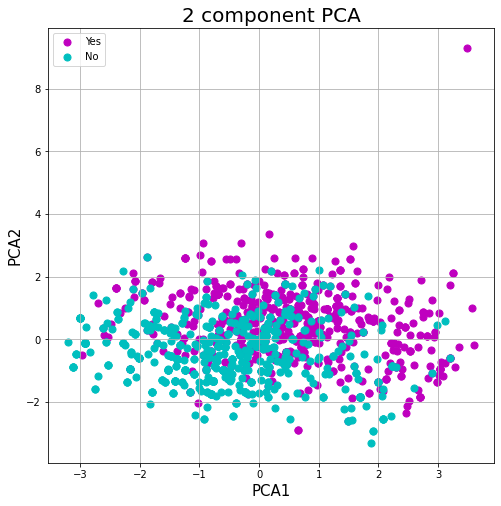

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Yes', 'No']
colors = ['m', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['treatment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

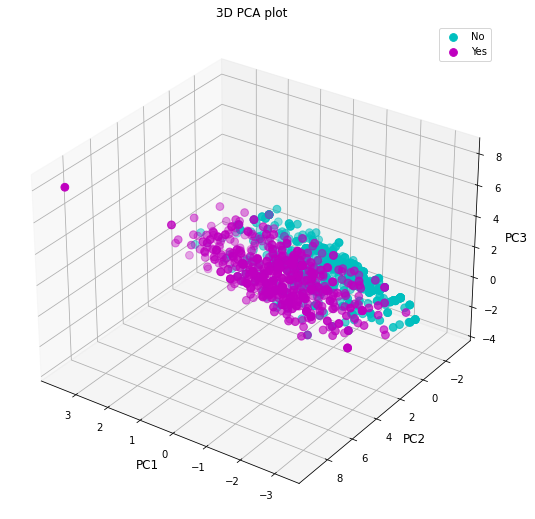

In [ ]:
pca = PCA(n_components=3)
 
pca.fit(x)
 
pca_bcancer = pca.transform(x)

Xax = pca_bcancer[:,0]
Yax = pca_bcancer[:,1]
Zax = pca_bcancer[:,2]

cdict = {'Yes':'m','No':'c'}
label = {'No':'No','Yes':'Yes'}
y = df['treatment']
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=60,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

In [ ]:
df['treatment'].value_counts()

Yes    638
No     621
Name: treatment, dtype: int64

# **Decision Tree - 83% accuracy**

In [ ]:
dtree = DecisionTreeClassifier(max_depth=2,criterion='gini',min_samples_leaf =5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [ ]:
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)

In [ ]:
acc

0.8306878306878307

**Prediction**

In [ ]:
###'age','family_history','work_interfere', 'remote_work','tech_company','care_options','wellness_program','seek_help','mental_health_consequence','phys_health_consequence']

li = [[35,0,2,0,0,0,0,0,1,0],[18,0,0,1,1,1,0,1,0,0],[22,1,0,0,0,1,1,0,0,0],[55,1,0,0,0,1,1,0,0,0],[22,0,3,1,1,0,1,1,0,0],[24,0,1,1,1,0,1,0,1,1],[29,0,0,1,0,0,1,0,0,0]]

for i in li:
  a = np.array(i)
  result = dtree.predict(a.reshape(1,-1))

  print(result)


['Yes']
['No']
['No']
['No']
['Yes']
['Yes']
['No']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does 

In [ ]:
best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
        for min_samples_leaf in [5, 10, 20, 30,40,50,60,70]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

In [ ]:
best_params

'criterion: gini, max_depth: 2, min_samples_leaf: 5'

In [ ]:
best_acc

0.8306878306878307

In [ ]:
feature_cols = ['age','family_history','work_interfere', 'remote_work','tech_company','care_options','wellness_program','seek_help','mental_health_consequence','phys_health_consequence']

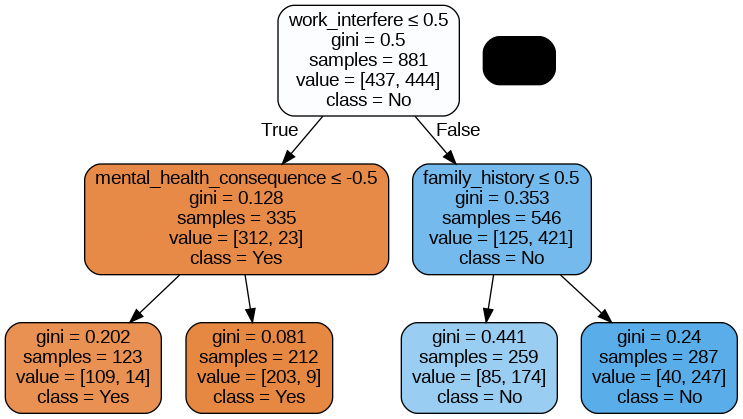

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Yes','No'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision-tree.png')
Image(graph.create_png())

              precision    recall  f1-score   support

          No       0.92      0.71      0.80       184
         Yes       0.78      0.94      0.85       194

    accuracy                           0.83       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.85      0.83      0.83       378



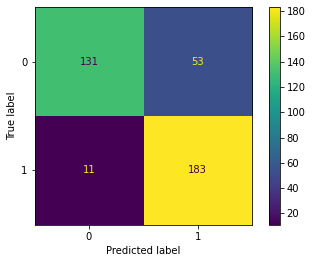

In [ ]:
y_pred = dtree.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## **Random Forest Tree- 82% accuracy**


In [ ]:
rf = RandomForestClassifier(max_depth=6, max_features=None,n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=300)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8253968253968254


**Prediction**

In [ ]:
###'age','family_history','work_interfere', 'remote_work','tech_company','care_options','wellness_program','seek_help','mental_health_consequence','phys_health_consequence']

li = [[35,0,2,0,0,0,0,0,1,0],[18,0,0,1,1,1,0,1,0,0],[22,1,0,0,0,1,1,0,0,0],[55,1,0,0,0,1,1,0,0,0],[22,0,3,1,1,0,1,1,0,0],[24,0,1,1,1,0,1,0,1,1],[29,0,0,1,0,0,1,0,0,0]]

for i in li:
  a = np.array(i)
  result = rf.predict(a.reshape(1,-1))

  print(result)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

['Yes']
['No']
['No']
['No']
['Yes']
['No']
['No']


In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,10000],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    
}
###'max_leaf_nodes': [3, 6, 9, 12],

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [25, 50, 100, 150, 200, 300, 400, 500,
                                          600, 700, 800, 900, 1000, 1100, 1200,
                                          1300, 1400, 1500, 1600, 1700, 1800,
                                          1900, 10000]})

In [ ]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}

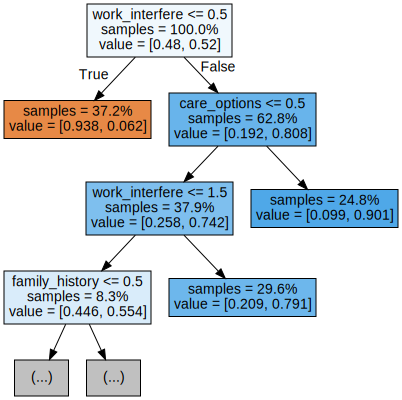

In [ ]:
for i in range(1):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True,
                               )
    graph = graphviz.Source(dot_data)
    display(graph)
    

              precision    recall  f1-score   support

          No       0.89      0.73      0.80       184
         Yes       0.78      0.91      0.84       194

    accuracy                           0.83       378
   macro avg       0.84      0.82      0.82       378
weighted avg       0.83      0.83      0.82       378



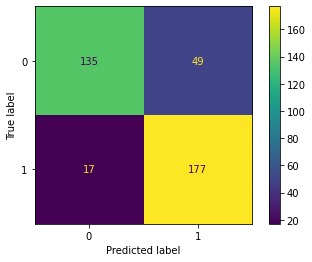

In [ ]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


## **Naive Bayes and Bernoulli NB -73% accuracy**

In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7380952380952381


              precision    recall  f1-score   support

          No       0.67      0.91      0.77       184
         Yes       0.87      0.58      0.69       194

    accuracy                           0.74       378
   macro avg       0.77      0.74      0.73       378
weighted avg       0.77      0.74      0.73       378



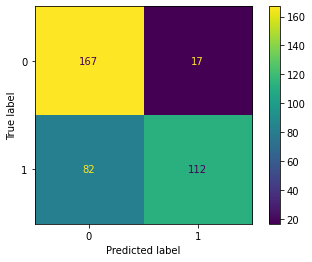

In [ ]:
# Generate predictions with the best model
y_pred = gnb.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8174603174603174


              precision    recall  f1-score   support

          No       0.85      0.76      0.80       184
         Yes       0.79      0.87      0.83       194

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



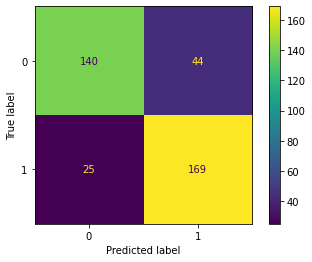

In [ ]:
# Generate predictions with the best model
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## **SVM - 80% accuracy**

In [ ]:
#Create a svm Classifier
clf = svm.SVC(C=0.3, gamma=0.1, kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8015873015873016


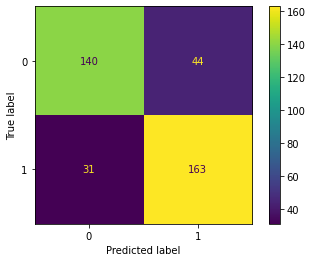

In [ ]:
# Generate predictions with the best model
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# defining parameter range
param_grid = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['rbf','linear']
        }
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.3, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=0.3, gamma=0.1, kernel='linear')


In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

          No       0.82      0.76      0.79       184
         Yes       0.79      0.84      0.81       194

    accuracy                           0.80       378
   macro avg       0.80      0.80      0.80       378
weighted avg       0.80      0.80      0.80       378



## **KNeighborsClassifier -80% accuracy**

In [ ]:

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8174603174603174


              precision    recall  f1-score   support

          No       0.79      0.77      0.78       184
         Yes       0.79      0.80      0.80       194

    accuracy                           0.79       378
   macro avg       0.79      0.79      0.79       378
weighted avg       0.79      0.79      0.79       378



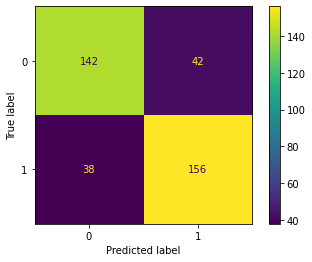

In [ ]:
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## **Neural Network- 86% training acc, 83% test acc**

In [ ]:
df = pd.read_csv('survey.csv')

d = {'Yes': 1, 'No': 0}
df['family_history'] = df['family_history'].map(d)
d = {'NA': 0, 'Never': 0, 'Rarely':1, 'Sometimes':2, 'Often':3 }
df['work_interfere'] = df['work_interfere'].map(d)
d = {'Yes': 1, 'No': 0}
df['remote_work'] =df['remote_work'].map(d)
d = {'Yes': 1, 'No': 0}
df['tech_company'] = df['tech_company'].map(d)
d = {'Yes': 1, 'No': 0, 'Not sure':-1}
df['care_options'] = df['care_options'].map(d)
d = {'Yes': 1, 'No': 0, "Don't know":-1}
df['wellness_program'] = df['wellness_program'].map(d)
d = {'Yes': 1, 'No': 0, "Don't know":-1}
df['seek_help'] = df['seek_help'].map(d)
d = {'Yes': 1, 'No': 0, "Maybe":-1}
df['mental_health_consequence'] = df['mental_health_consequence'].map(d)
d= d = {'Yes': 1, 'No': 0, "Maybe":-1}
df['phys_health_consequence'] = df['phys_health_consequence'].map(d)
d = {'Yes': 1, 'No': 0}
df['treatment'] =df['treatment'].map(d)

df['work_interfere'] = df['work_interfere'].fillna(0).astype(int)

In [ ]:
TargetVariable=['treatment']
Predictors=['age','family_history','work_interfere', 'remote_work','tech_company','care_options','wellness_program','seek_help','mental_health_consequence','phys_health_consequence']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
 
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(881, 10)
(881, 1)
(378, 10)
(378, 1)


In [ ]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=11, input_dim=10, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

In [ ]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(X_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100, 200]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=11, input_dim=10, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

###############################################

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

In [ ]:
# Training the model with best hyperparamters
classifier.fit(X_train,y_train, batch_size=5 , epochs=500, verbose=1)

In [ ]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=X_test

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['treatment']=y_test
TestingData['Prob']=Predictions

# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)

# Generating predictions on the testing data by applying probability threshold
TestingData['treatment_required']=TestingData['Prob'].apply(probThreshold)
print(TestingData.head())

###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['treatment'], TestingData['treatment_required']))
print(metrics.confusion_matrix(TestingData['treatment'], TestingData['treatment_required']))

12/12 [==============================] - 0s 5ms/step
   age  family_history  work_interfere  remote_work  tech_company  \
0   25               0               0            1             1   
1   25               0               0            0             1   
2   18               0               3            0             1   
3   22               0               0            1             1   
4   31               1               2            1             1   

   care_options  wellness_program  seek_help  mental_health_consequence  \
0             1                 1          1                          0   
1             1                 1          1                         -1   
2            -1                 0          0                          1   
3             0                -1         -1                         -1   
4            -1                -1         -1                         -1   

   phys_health_consequence  treatment      Prob  treatment_required  
0          

In [ ]:
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return('Yes')
    else:
        return('No')

In [ ]:

###'age','family_history','work_interfere', 'remote_work','tech_company','care_options','wellness_program','seek_help','mental_health_consequence','phys_health_consequence']
li = [[35,0,2,0,0,0,0,0,1,0],[18,0,0,1,1,1,0,1,0,0],[22,1,0,0,0,1,1,0,0,0],[55,1,0,0,0,1,1,0,0,0],[22,0,3,1,1,0,1,1,0,0],[24,0,1,1,1,0,1,0,1,1],[29,0,0,1,0,0,1,0,0,0]]

for i in li:
  a = np.array(i)
  result = classifier.predict(a.reshape(1,-1))

  print(probThreshold(result))

1/1 [==============================] - 0s 123ms/step
Yes
1/1 [==============================] - 0s 90ms/step
No
1/1 [==============================] - 0s 35ms/step
No
1/1 [==============================] - 0s 38ms/step
No
1/1 [==============================] - 0s 29ms/step
Yes
1/1 [==============================] - 0s 33ms/step
No
1/1 [==============================] - 0s 31ms/step
No


## **XG-Boost**

In [ ]:
model = XGBClassifier(random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))


print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       441
           1       0.98      0.99      0.98       440

    accurac

In [ ]:
#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None,
                                     grow_policy='lossguide',
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learnin...
                         'max_cat_threshold': [None],
                         'max_cat_to_onehot': [None], 'max_delta_step': [None],
                         'max_depth': [None], 'max_leaves': [None],
                         'min_child_weight': [None], 'missing': [nan],
                         'monotone_constraints': [None], 'n_estimators': [100],
                         'n_jobs': [None], 'num_parallel_tree': [None],
                         'objective': ['binary:logistic'], 'predictor': [None], ...},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))


print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       180
           1       0.81      0.82      0.81       198

    accuracy                           0.80       378
   macro avg       0.80      0.80      0.80       378
weighted avg       0.80      0.80      0.80       378

Confusion matrix
-------------------------------------------------------
[[141  39]
 [ 36 162]]
